In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df=pd.read_csv('fault.csv')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10892 entries, 0 to 10891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ia        10892 non-null  int64 
 1   Ib        10892 non-null  int64 
 2   VDC       10892 non-null  int64 
 3   IDC       10892 non-null  int64 
 4   T1        10892 non-null  int64 
 5   T2        10892 non-null  int64 
 6   T3        10892 non-null  int64 
 7   VD        10892 non-null  int64 
 8   Category  10892 non-null  object
dtypes: int64(8), object(1)
memory usage: 766.0+ KB


In [200]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Category'] = encoder.fit_transform(df['Category'])

# Display the updated DataFrame
print(df)


        Ia   Ib  VDC  IDC   T1   T2   T3   VD  Category
0      532  388  507  506  515  504  495  510         0
1      533  388  507  508  501  504  490  510         0
2      533  389  507  507  514  505  495  508         0
3      534  390  507  507  503  504  492  509         0
4      532  390  508  505  515  508  495  510         0
...    ...  ...  ...  ...  ...  ...  ...  ...       ...
10887  570  378  506  506  498  445  338  509         8
10888  566  421  507  504  498  446  338  510         8
10889  524  395  507  508  498  446  338  509         8
10890  545  433  508  506  499  446  338  509         8
10891  482  429  508  514  498  439  338  509         8

[10892 rows x 9 columns]


In [201]:
category_counts = df['Category'].value_counts()

print(category_counts)

Category
0    4295
7    1735
2    1122
8    1034
6     854
1     692
5     412
3     407
4     341
Name: count, dtype: int64


In [202]:
from scipy.stats import f_oneway

X = df.drop(columns=['Category'])
y = df['Category']

anova_results = {}
alpha = 0.5

for col in X.select_dtypes(include=['float64', 'int64']).columns:
    groups = [X[y == category][col] for category in y.unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {'f_stat': f_stat, 'p-value': p_value, 'significant': p_value < alpha}

anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
print(anova_df)


            f_stat       p-value  significant
Ia       52.574998  3.437209e-84         True
Ib       61.661548  3.852090e-99         True
VDC      29.545846  4.427042e-46         True
IDC       7.733273  2.152423e-10         True
T1   136211.277479  0.000000e+00         True
T2     6064.929555  0.000000e+00         True
T3    12386.601354  0.000000e+00         True
VD        3.284543  9.509483e-04         True


In [203]:
df = df.select_dtypes(include=['number'])

# Display the updated DataFrame
print(df)

        Ia   Ib  VDC  IDC   T1   T2   T3   VD  Category
0      532  388  507  506  515  504  495  510         0
1      533  388  507  508  501  504  490  510         0
2      533  389  507  507  514  505  495  508         0
3      534  390  507  507  503  504  492  509         0
4      532  390  508  505  515  508  495  510         0
...    ...  ...  ...  ...  ...  ...  ...  ...       ...
10887  570  378  506  506  498  445  338  509         8
10888  566  421  507  504  498  446  338  510         8
10889  524  395  507  508  498  446  338  509         8
10890  545  433  508  506  499  446  338  509         8
10891  482  429  508  514  498  439  338  509         8

[10892 rows x 9 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('Category', axis=1)  
y = df['Category']  


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


feature_importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:

duplicates = df.duplicated()


print(f"Number of duplicate rows: {duplicates.sum()}")


df.drop_duplicates(inplace=True)

print(f"Shape of DataFrame after removing duplicates: {df.shape}")


Number of duplicate rows: 17
Shape of DataFrame after removing duplicates: (10875, 9)


In [ ]:
import numpy as np

def adjust_outliers_iqr(df):
   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

   
    df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df_clipped

df_capped = df.copy()
df_capped[df_capped.select_dtypes(include=[np.number]).columns] = adjust_outliers_iqr(df_capped.select_dtypes(include=[np.number]))

# Display the modified DataFrame
print(df_capped.head())


    Ia   Ib    VDC    IDC   T1   T2     T3     VD  Category
0  532  388  507.0  506.0  515  504  493.5  510.0         0
1  533  388  507.0  508.0  501  504  490.0  510.0         0
2  533  389  507.0  507.0  514  505  493.5  508.0         0
3  534  390  507.0  507.0  503  504  492.0  509.0         0
4  532  390  508.0  505.0  515  508  493.5  510.0         0


In [207]:
category_counts = df_capped ['Category'].value_counts()

print(category_counts)

Category
0    4289
7    1734
2    1121
8    1034
6     854
1     692
5     410
3     407
4     334
Name: count, dtype: int64


In [208]:
df_capped

Ia   Ib    VDC    IDC   T1   T2     T3     VD  Category
0      532  388  507.0  506.0  515  504  493.5  510.0         0
1      533  388  507.0  508.0  501  504  490.0  510.0         0
2      533  389  507.0  507.0  514  505  493.5  508.0         0
3      534  390  507.0  507.0  503  504  492.0  509.0         0
4      532  390  508.0  505.0  515  508  493.5  510.0         0
...    ...  ...    ...    ...  ...  ...    ...    ...       ...
10887  570  378  506.0  506.0  498  445  457.5  509.0         8
10888  566  421  507.0  504.5  498  446  457.5  510.0         8
10889  524  395  507.0  508.0  498  446  457.5  509.0         8
10890  545  433  508.0  506.0  499  446  457.5  509.0         8
10891  482  429  508.0  508.5  498  439  457.5  509.0         8

[10875 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df_capped, test_size=0.20, random_state=42)


print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)


Training DataFrame shape: (8700, 9)
Testing DataFrame shape: (2175, 9)


In [ ]:

train_category_counts = train_df['Category'].value_counts()
test_category_counts = test_df['Category'].value_counts()

# Display the results
print("Category distribution in training set:")
print(train_category_counts)

print("\nCategory distribution in testing set:")
print(test_category_counts)


Category distribution in training set:
Category
0    3427
7    1389
2     885
8     832
6     678
1     550
5     335
3     323
4     281
Name: count, dtype: int64

Category distribution in testing set:
Category
0    862
7    345
2    236
8    202
6    176
1    142
3     84
5     75
4     53
Name: count, dtype: int64


Optimal number of features: 6
Selected features: Index(['Ia', 'Ib', 'VDC', 'T1', 'T2', 'T3'], dtype='object')


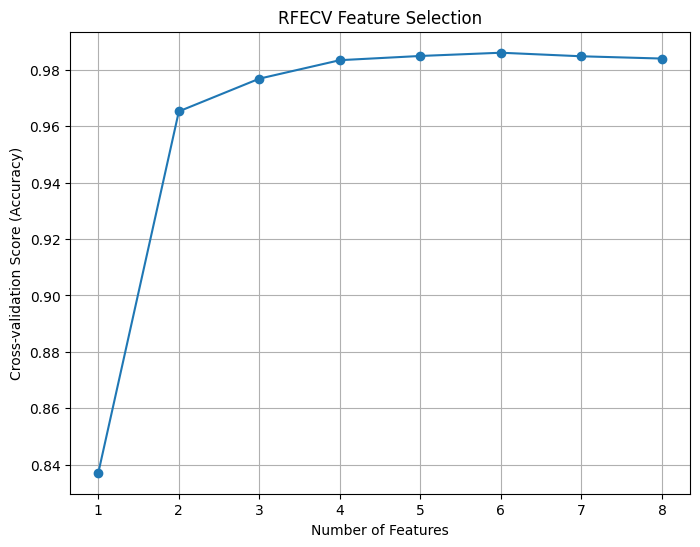

Final selected features: Index(['Ia', 'Ib', 'VDC', 'T1', 'T2', 'T3'], dtype='object')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


X_train = train_df.drop(columns=['Category'])
y_train = train_df['Category']


clf = RandomForestClassifier(n_estimators=100, random_state=42)


cv = StratifiedKFold(n_splits=5)


selector = RFECV(estimator=clf, step=1, cv=cv, scoring='accuracy')
selector = selector.fit(X_train, y_train)


optimal_num_features = selector.n_features_
selected_features = X_train.columns[selector.support_]


print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {selected_features}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1),
         selector.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation Score (Accuracy)")
plt.title("RFECV Feature Selection")
plt.grid(True)
plt.show()


final_selected_features = selected_features[:min(optimal_num_features, 7)]
print(f"Final selected features: {final_selected_features}")


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter



X_train = train_df.drop(columns=['Category'])
y_train = train_df['Category']


print("Class distribution before resampling:")
print(Counter(y_train))


smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


train_df_balanced = pd.DataFrame(X_resampled, columns=X_train.columns)
train_df_balanced['Category'] = y_resampled


print("Class distribution after SMOTE:")
print(Counter(y_resampled))

Class distribution before resampling:
Counter({0: 3427, 7: 1389, 2: 885, 8: 832, 6: 678, 1: 550, 5: 335, 3: 323, 4: 281})
Class distribution after SMOTE:
Counter({7: 3427, 0: 3427, 3: 3427, 2: 3427, 8: 3427, 1: 3427, 5: 3427, 6: 3427, 4: 3427})


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


numeric_cols = train_df_balanced.drop(columns=['Category']).columns


train_df_balanced[numeric_cols] = scaler.fit_transform(train_df_balanced[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Display first few rows to verify standardization
print("Standardized Train Data:\n", train_df_balanced.head())
print("Standardized Test Data:\n", test_df.head())


Standardized Train Data:
          Ia        Ib       VDC       IDC        T1        T2        T3  \
0  0.116435  0.277610  0.443194  0.442729 -1.699055  1.027265 -0.519312   
1  0.731446 -0.302249 -0.654280  0.442729 -1.699055 -1.732005 -0.697796   
2  0.208687  0.158664 -0.654280 -0.704991  1.793979  1.169986  0.373106   
3 -1.790099  1.719823 -1.751753 -0.704991  0.345648  0.075793  0.373106   
4  1.546336 -1.402495  1.540667  1.590449  0.430844  0.836971 -0.251587   

         VD  Category  
0  0.938197         7  
1 -0.585455         7  
2  0.938197         0  
3  2.461848         3  
4 -0.585455         2  
Standardized Test Data:
             Ia        Ib       VDC       IDC        T1        T2        T3  \
5511  0.193311  0.203269  0.443194  0.442729  0.430844  0.836971 -0.073103   
668   0.546943 -1.655254  0.443194  0.442729  1.793979  1.169986  0.283864   
4822  0.408565 -0.911845  1.540667 -0.704991  0.345648  0.836971  0.105380   
346   0.577693 -1.655254 -0.654280 -0.7049

In [21]:
pip install catboost

In [29]:
!pip install --upgrade numpy catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00


In [30]:
!pip install --no-cache-dir --force-reinstall numpy catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 168.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 221.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 133.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 148.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 154.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 150.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import time
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



features = ['Ia', 'Ib', 'VDC', 'T1', 'T2', 'T3']


X_balanced = train_df_balanced[features]
y_balanced = train_df_balanced['Category']


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    
    start_time = time.time()
    clf.fit(X_balanced, y_balanced)
    end_time = time.time()

    
    y_train_pred = clf.predict(X_balanced)

    print(f"\n{clf_name} Training Classification Report:")
    print(classification_report(y_balanced, y_train_pred, digits=4))

  
    print(f"Training Time: {end_time - start_time:.4f} seconds")



Training Random Forest...

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9971    0.9980      3427
           1     0.9939    0.9942    0.9940      3427
           2     0.9921    0.9933    0.9927      3427
           3     1.0000    1.0000    1.0000      3427
           4     1.0000    1.0000    1.0000      3427
           5     1.0000    1.0000    1.0000      3427
           6     0.9802    0.9988    0.9894      3427
           7     0.9985    0.9799    0.9891      3427
           8     1.0000    1.0000    1.0000      3427

    accuracy                         0.9959     30843
   macro avg     0.9960    0.9959    0.9959     30843
weighted avg     0.9960    0.9959    0.9959     30843

Training Time: 5.0778 seconds

Training Decision Tree...

Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9980    0.9987      3427
        

In [ ]:
import time
import psutil
import numpy as np
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


features = ['Ia', 'Ib', 'VDC', 'T1', 'T2', 'T3']


X_balanced = train_df_balanced[features]
y_balanced = train_df_balanced['Category']

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024) 


for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

   
    mem_before = get_memory_usage()

    
    start_time = time.time()
    clf.fit(X_balanced, y_balanced)
    end_time = time.time()

    
    mem_after = get_memory_usage()

    inference_start_time = time.time()
    y_train_pred = clf.predict(X_balanced)
    inference_end_time = time.time()

    
    print(f"\n{clf_name} Training Classification Report:")
    print(classification_report(y_balanced, y_train_pred, digits=4))

    
    print(f"Training Time: {end_time - start_time:.4f} seconds")
    print(f"Inference Time: {inference_end_time - inference_start_time:.4f} seconds")
    print(f"Memory Usage: {mem_after - mem_before:.4f} MB (Memory increase during training)")




Training Random Forest...

Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9971    0.9980      3427
           1     0.9939    0.9942    0.9940      3427
           2     0.9921    0.9933    0.9927      3427
           3     1.0000    1.0000    1.0000      3427
           4     1.0000    1.0000    1.0000      3427
           5     1.0000    1.0000    1.0000      3427
           6     0.9802    0.9988    0.9894      3427
           7     0.9985    0.9799    0.9891      3427
           8     1.0000    1.0000    1.0000      3427

    accuracy                         0.9959     30843
   macro avg     0.9960    0.9959    0.9959     30843
weighted avg     0.9960    0.9959    0.9959     30843

Training Time: 4.3460 seconds
Inference Time: 0.3849 seconds
Memory Usage: 0.0000 MB (Memory increase during training)

Training Decision Tree...

Decision Tree Training Classification Report:
              precision    r


Training Random Forest...
5-Fold Cross-Validation Accuracy for Random Forest: [0.98800454 0.99546118 0.99448857 0.99546044 0.99464981]
Mean CV Accuracy: 0.9936
Standard Deviation of CV Accuracy: 0.0028
Training Time: 18.3930 seconds


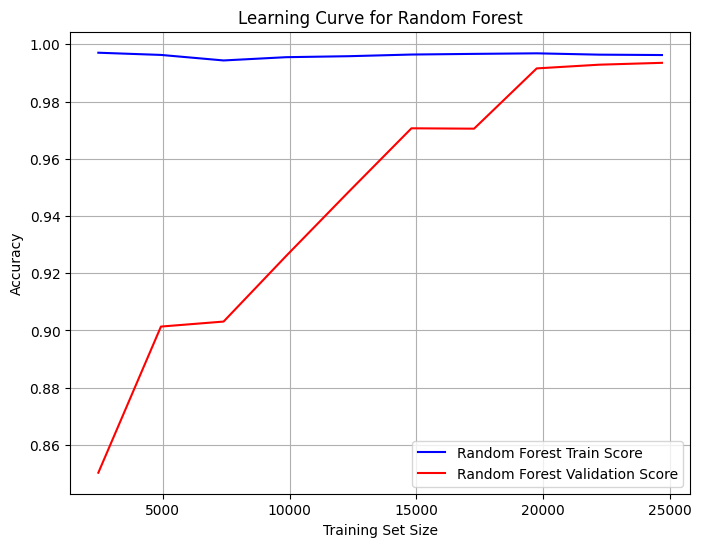


Training Decision Tree...
5-Fold Cross-Validation Accuracy for Decision Tree: [0.97730588 0.99335387 0.99302966 0.99448768 0.99383917]
Mean CV Accuracy: 0.9904
Standard Deviation of CV Accuracy: 0.0066
Training Time: 0.4119 seconds



Training Extra Trees...
5-Fold Cross-Validation Accuracy for Extra Trees: [0.9808721  0.98362782 0.98362782 0.98411154 0.98167964]
Mean CV Accuracy: 0.9828
Standard Deviation of CV Accuracy: 0.0013
Training Time: 4.5124 seconds



Training KNN...
5-Fold Cross-Validation Accuracy for KNN: [0.97844059 0.98524882 0.98638353 0.98767834 0.98427367]
Mean CV Accuracy: 0.9844
Standard Deviation of CV Accuracy: 0.0032
Training Time: 2.0865 seconds


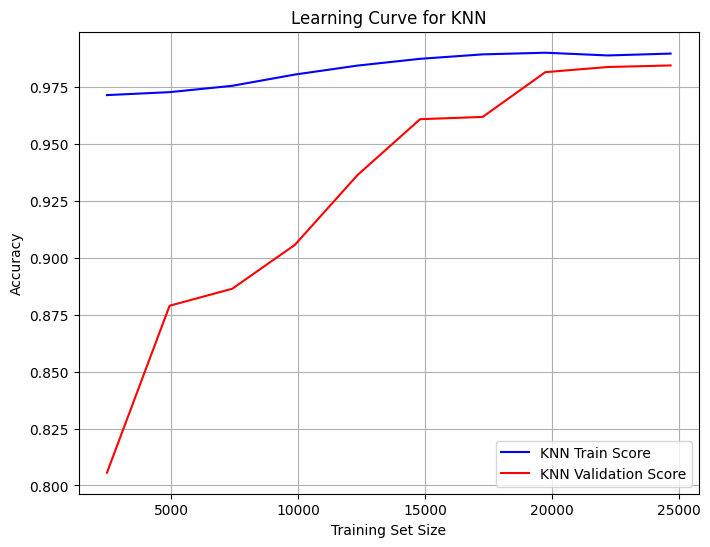


Training MLP...
5-Fold Cross-Validation Accuracy for MLP: [0.98508672 0.99238126 0.99205706 0.99367704 0.99254215]
Mean CV Accuracy: 0.9911
Standard Deviation of CV Accuracy: 0.0031
Training Time: 185.5105 seconds


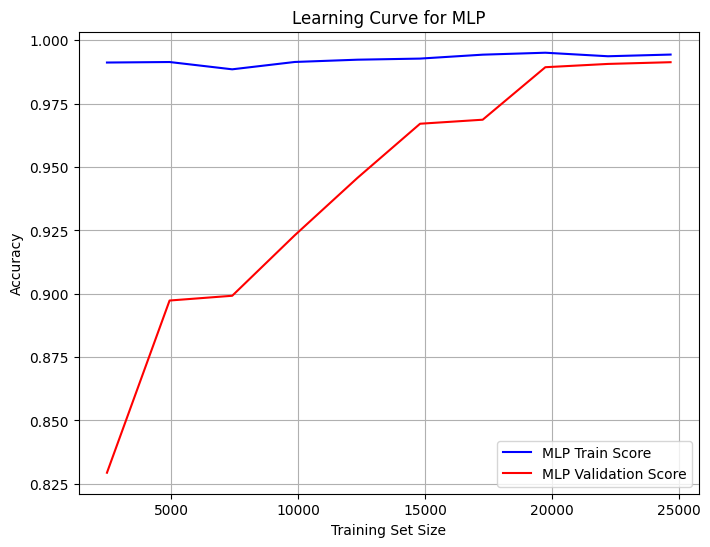


Training CatBoost...
5-Fold Cross-Validation Accuracy for CatBoost: [0.98784244 0.99367807 0.99351597 0.99513619 0.99383917]
Mean CV Accuracy: 0.9928
Standard Deviation of CV Accuracy: 0.0025
Training Time: 88.3201 seconds


In [ ]:
import time
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_balanced = train_df_balanced[features]
y_balanced = train_df_balanced['Category']


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    
    start_time = time.time()

 
    cv_accuracy = cross_val_score(clf, X_balanced, y_balanced, cv=5, scoring='accuracy')


    end_time = time.time()
    training_time = end_time - start_time

 
    print(f"5-Fold Cross-Validation Accuracy for {clf_name}: {cv_accuracy}")
    print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
    print(f"Standard Deviation of CV Accuracy: {np.std(cv_accuracy):.4f}")
    print(f"Training Time: {training_time:.4f} seconds")

  
    train_sizes, train_scores, valid_scores = learning_curve(clf, X_balanced, y_balanced, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

   
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=f'{clf_name} Train Score', color='b')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label=f'{clf_name} Validation Score', color='r')
    plt.title(f"Learning Curve for {clf_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


In [ ]:
import time
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier




X_train = train_df_balanced[features]
y_train = train_df_balanced['Category']
X_test = test_df[features]
y_test = test_df['Category']


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")


    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

 
    test_start_time = time.time()
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    test_time = time.time() - test_start_time

 
    if y_pred_prob is not None:
        auc_score = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")
    else:
        auc_score = "N/A"

    print(f"\n{clf_name} Test Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"AUC Score (OvR): {auc_score:.4f}" if isinstance(auc_score, float) else f"AUC Score: {auc_score}")
    print(f"Training Time: {train_time:.4f} sec | Testing Time: {test_time:.4f} sec")



Training Random Forest...

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9930    0.9959       862
           1     0.9524    0.9859    0.9689       142
           2     0.9745    0.9703    0.9724       236
           3     0.9882    1.0000    0.9941        84
           4     0.9811    0.9811    0.9811        53
           5     1.0000    1.0000    1.0000        75
           6     0.9454    0.9830    0.9638       176
           7     0.9911    0.9710    0.9810       345
           8     1.0000    1.0000    1.0000       202

    accuracy                         0.9867      2175
   macro avg     0.9813    0.9872    0.9841      2175
weighted avg     0.9869    0.9867    0.9867      2175

AUC Score (OvR): 0.9998
Training Time: 2.7079 sec | Testing Time: 0.0878 sec

Training Decision Tree...

Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0     0.9988

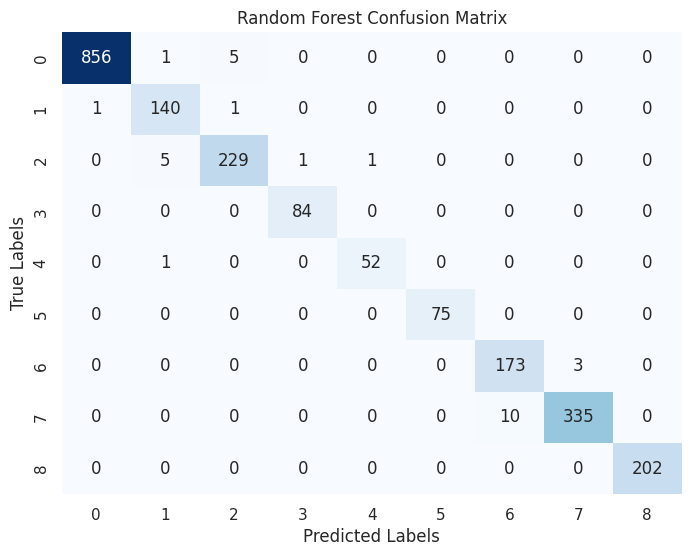

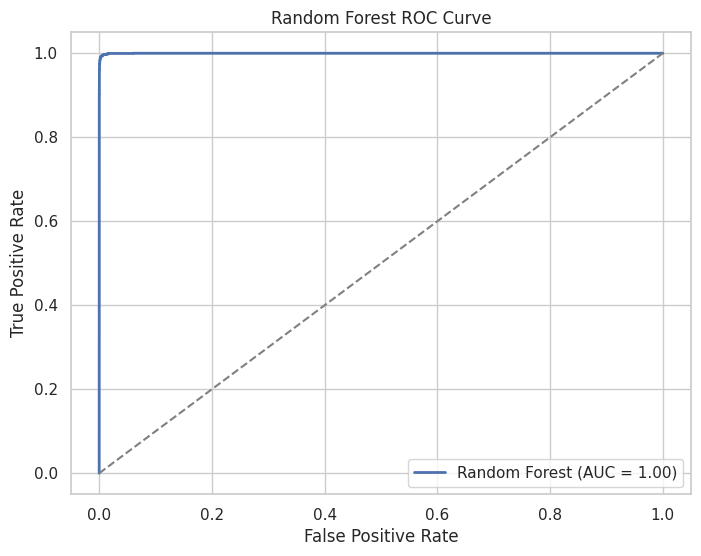

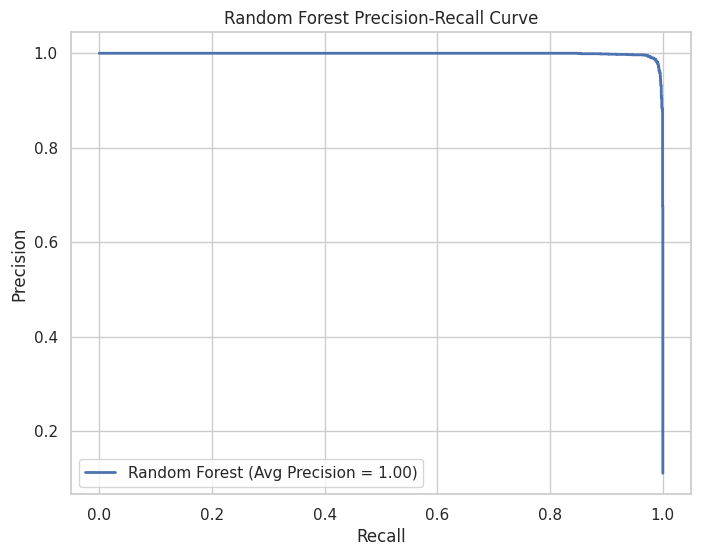

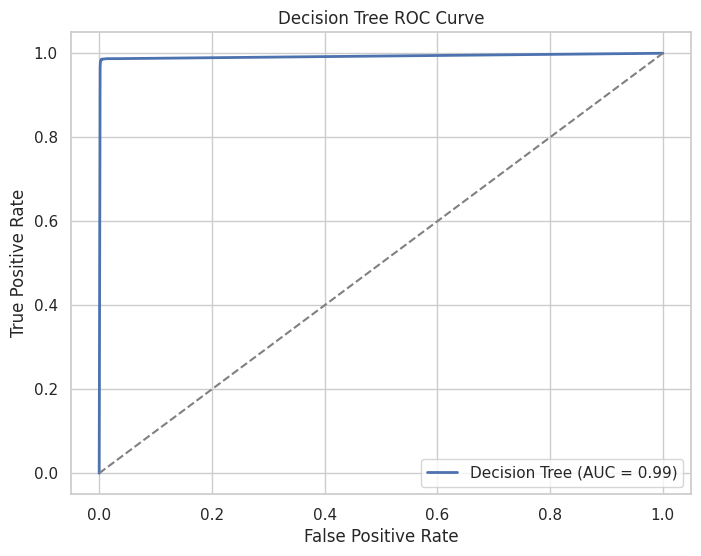

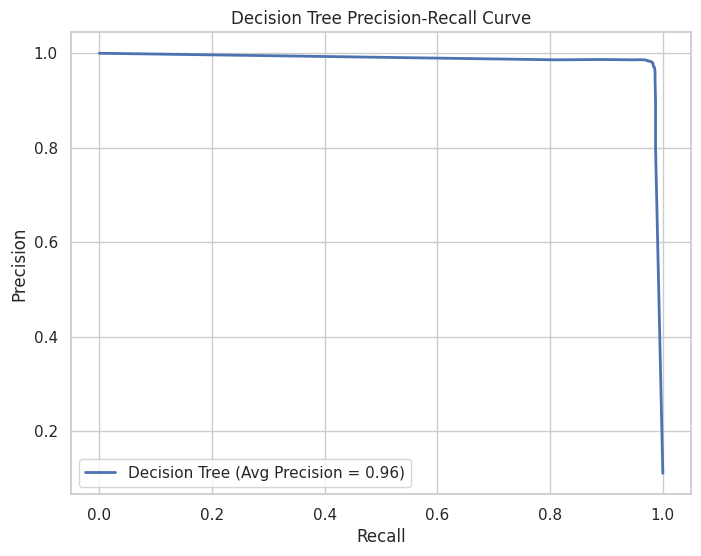

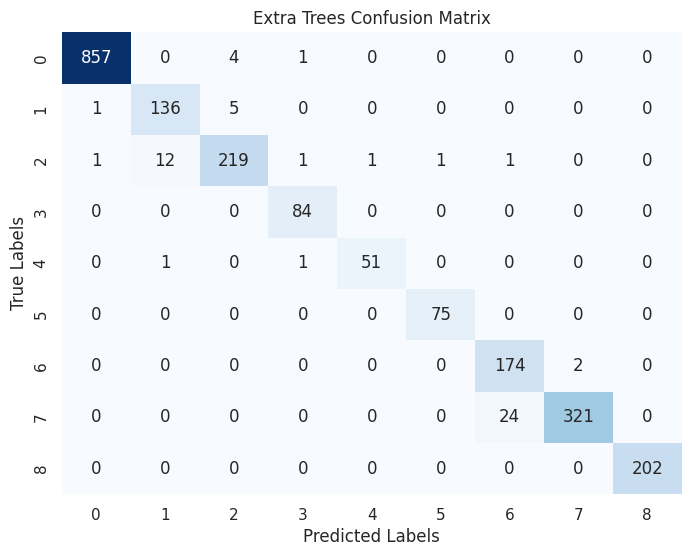

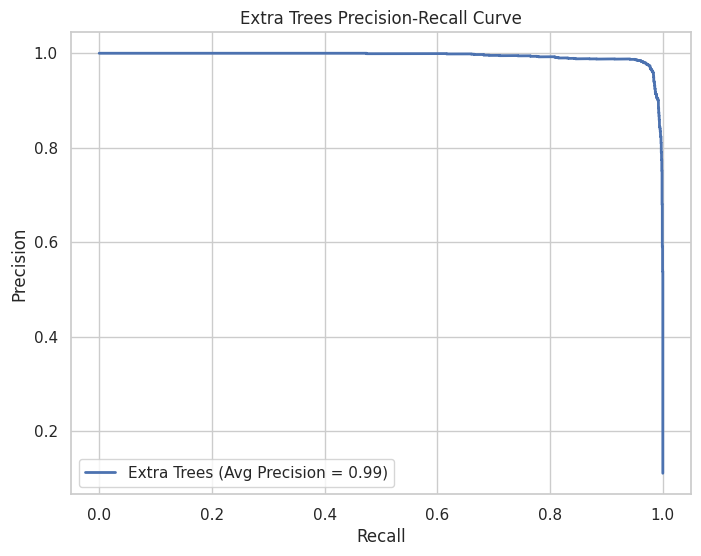

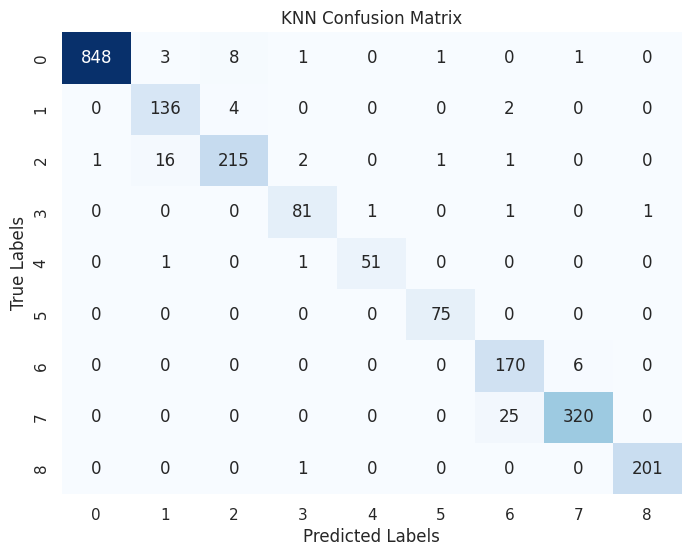

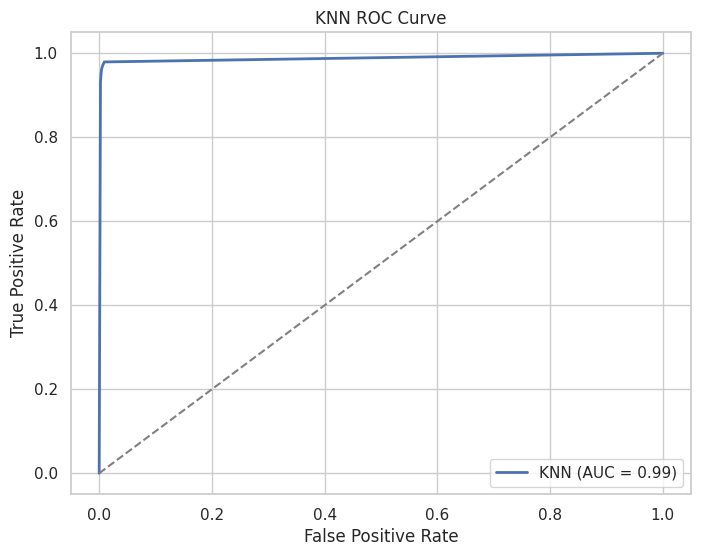

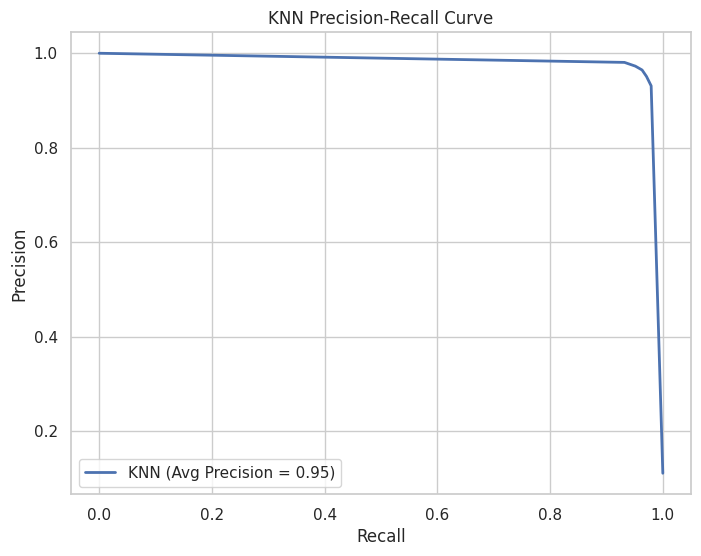

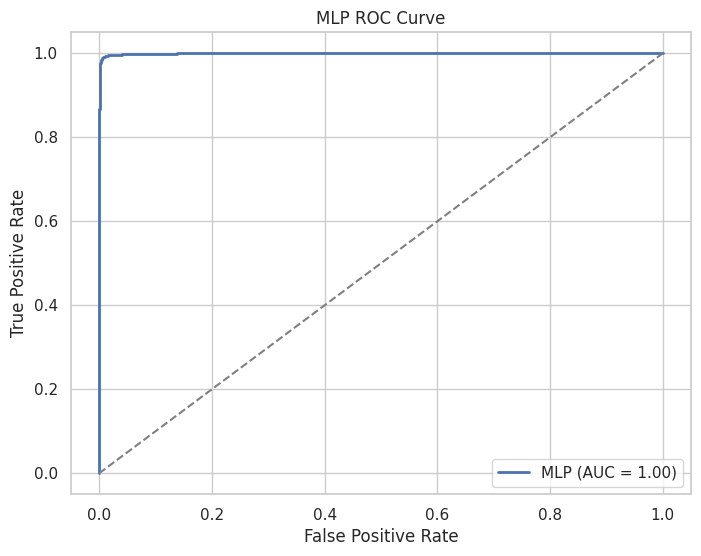

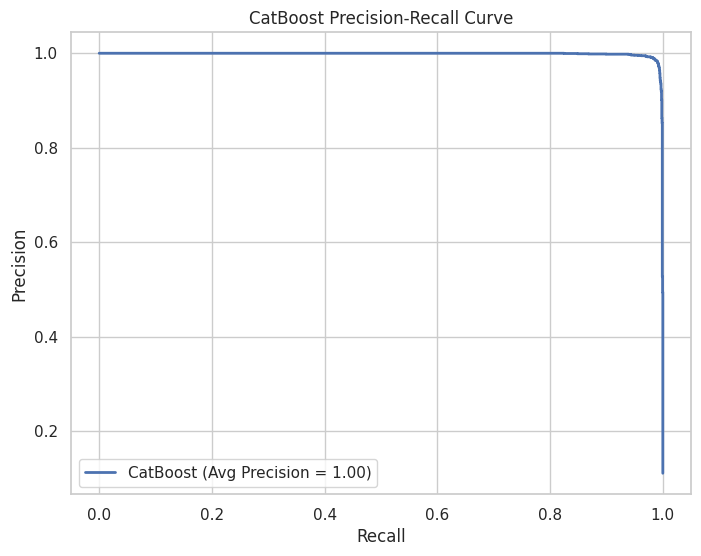

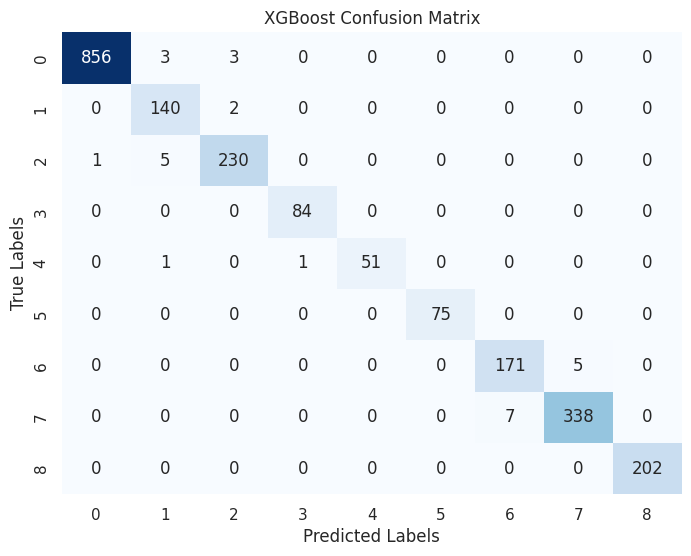

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

sns.set(style="whitegrid")


for clf_name, clf in classifiers.items():
    try:
        
        clf.fit(X_train, y_train)

        
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"{clf_name} Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

       
        if y_pred_prob is not None:
          
            y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
            fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='b', lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title(f"{clf_name} ROC Curve")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.show()

     
        if y_pred_prob is not None:
            avg_precision = average_precision_score(y_test_binarized, y_pred_prob, average="macro")
            precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, color='b', lw=2, label=f'{clf_name} (Avg Precision = {avg_precision:.2f})')
            plt.title(f"{clf_name} Precision-Recall Curve")
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.legend(loc="lower left")
            plt.show()

    except Exception as e:
        print(f"Error with {clf_name}: {e}")


In [ ]:
from sklearn.metrics import confusion_matrix

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}

for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")
    clf.fit(X_balanced, y_balanced)
    y_test_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"\n{clf_name} Confusion Matrix:")
    print(cm)

    print(f"\nFor {clf_name}:")
    for i in range(len(lb.classes_)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        print(f"\nClass: {lb.classes_[i]}")
        print(f"True Negative (TN): {TN}")
        print(f"False Positive (FP): {FP}")
        print(f"False Negative (FN): {FN}")
        print(f"True Positive (TP): {TP}")
        print(f"Interpretation for {lb.classes_[i]}:")
        print(f"- True Positives (TP): {TP} instances of class {lb.classes_[i]} correctly predicted as {lb.classes_[i]}.")
        print(f"- False Positives (FP): {FP} instances of class {lb.classes_[i]} incorrectly predicted as {lb.classes_[i]}.")
        print(f"- False Negatives (FN): {FN} instances of class {lb.classes_[i]} incorrectly predicted as not {lb.classes_[i]}.")
        print(f"- True Negatives (TN): {TN} instances correctly predicted as not {lb.classes_[i]}.")

    print("\n" + "="*50)


Training Random Forest...

Random Forest Confusion Matrix:
[[2249    0    0  135   99    0]
 [   0  185    0    0    0    0]
 [   0    0  551    0    0    0]
 [  13    0    0  205    0    0]
 [  21    0    0    3  802    0]
 [   0    0    0    0    0  569]]

For Random Forest:

Class: 0
True Negative (TN): 2315
False Positive (FP): 34
False Negative (FN): 234
True Positive (TP): 2249
Interpretation for 0:
- True Positives (TP): 2249 instances of class 0 correctly predicted as 0.
- False Positives (FP): 34 instances of class 0 incorrectly predicted as 0.
- False Negatives (FN): 234 instances of class 0 incorrectly predicted as not 0.
- True Negatives (TN): 2315 instances correctly predicted as not 0.

Class: 1
True Negative (TN): 4647
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 185
Interpretation for 1:
- True Positives (TP): 185 instances of class 1 correctly predicted as 1.
- False Positives (FP): 0 instances of class 1 incorrectly predicted as 1.
- False Negati

In [217]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)


start_train_time = time.time()


voting_clf.fit(X_balanced, y_balanced)

end_train_time = time.time()
train_time = end_train_time - start_train_time


y_train_pred_voting = voting_clf.predict(X_balanced)


start_test_time = time.time()


y_test_pred_voting = voting_clf.predict(X_test)


end_test_time = time.time()
test_time = end_test_time - start_test_time


print("\nVoting Classifier Training Classification Report:")
print(classification_report(y_balanced, y_train_pred_voting, digits=4))
print(f"Training Time: {train_time:.4f} seconds")

print("\nVoting Classifier Test Classification Report:")
print(classification_report(y_test, y_test_pred_voting, digits=4))
print(f"Testing Time: {test_time:.4f} seconds")



Voting Classifier Training Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3427
           1     0.9965    0.9971    0.9968      3427
           2     0.9971    0.9965    0.9968      3427
           3     1.0000    1.0000    1.0000      3427
           4     1.0000    1.0000    1.0000      3427
           5     1.0000    1.0000    1.0000      3427
           6     0.9876    0.9997    0.9936      3427
           7     0.9997    0.9875    0.9935      3427
           8     1.0000    1.0000    1.0000      3427

    accuracy                         0.9979     30843
   macro avg     0.9979    0.9979    0.9979     30843
weighted avg     0.9979    0.9979    0.9979     30843

Training Time: 103.9439 seconds

Voting Classifier Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9942    0.9971       862
           1     0.9456    0.9789    0.9619       142
  

In [ ]:
import time
import psutil
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)


def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # in MB


mem_before = get_memory_usage()


start_train_time = time.time()
voting_clf.fit(X_balanced, y_balanced)
end_train_time = time.time()
train_time = end_train_time - start_train_time


mem_after = get_memory_usage()


y_train_pred_voting = voting_clf.predict(X_balanced)

# Predict on test data
start_test_time = time.time()
y_test_pred_voting = voting_clf.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Print results
print("\nVoting Classifier Training Classification Report:")
print(classification_report(y_balanced, y_train_pred_voting, digits=4))
print(f"Training Time: {train_time:.4f} seconds")
print(f"Memory Usage During Training: {mem_after - mem_before:.4f} MB")

print("\nVoting Classifier Test Classification Report:")
print(classification_report(y_test, y_test_pred_voting, digits=4))
print(f"Testing Time: {test_time:.4f} seconds")



Voting Classifier Training Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3427
           1     0.9965    0.9971    0.9968      3427
           2     0.9971    0.9965    0.9968      3427
           3     1.0000    1.0000    1.0000      3427
           4     1.0000    1.0000    1.0000      3427
           5     1.0000    1.0000    1.0000      3427
           6     0.9876    0.9997    0.9936      3427
           7     0.9997    0.9875    0.9935      3427
           8     1.0000    1.0000    1.0000      3427

    accuracy                         0.9979     30843
   macro avg     0.9979    0.9979    0.9979     30843
weighted avg     0.9979    0.9979    0.9979     30843

Training Time: 72.7977 seconds
Memory Usage During Training: 2.6406 MB

Voting Classifier Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9942    0.9971       862
           1     

AUC Score: 0.9997

Confusion Matrix:
[[857   1   3   1   0   0   0   0   0]
 [  0 139   3   0   0   0   0   0   0]
 [  0   6 228   1   1   0   0   0   0]
 [  0   0   0  83   1   0   0   0   0]
 [  0   1   0   1  51   0   0   0   0]
 [  0   0   0   0   0  75   0   0   0]
 [  0   0   0   0   0   0 173   3   0]
 [  0   0   0   0   0   0  11 334   0]
 [  0   0   0   0   0   0   0   0 202]]


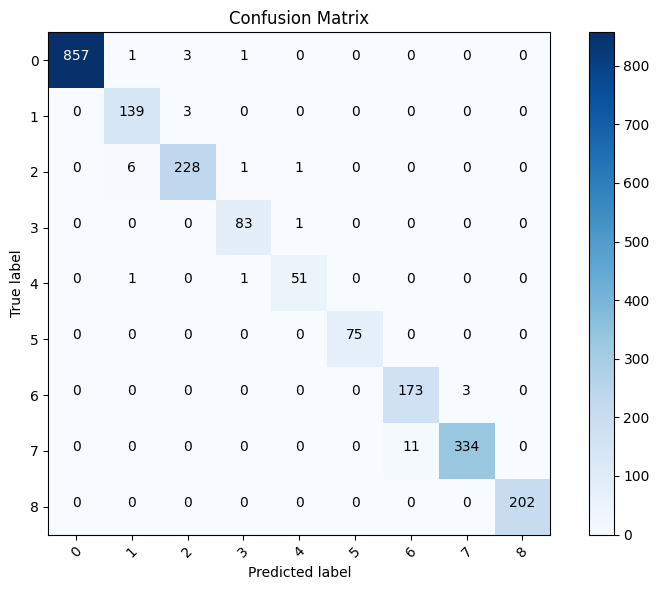

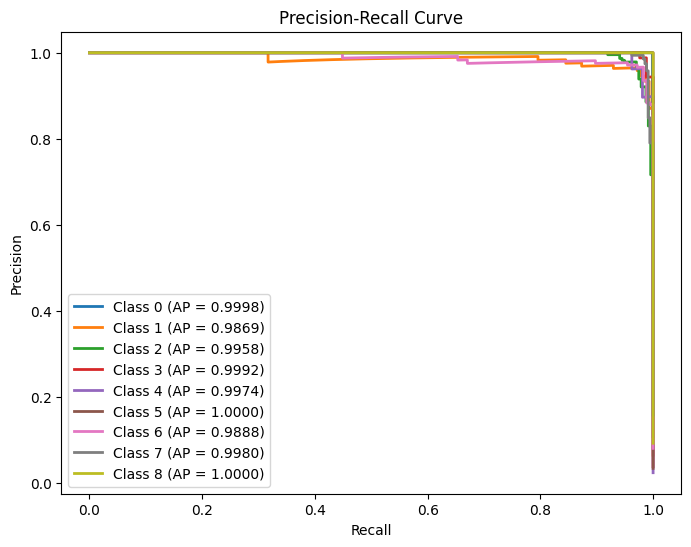

Class 0 Average Precision: 0.9998
Class 1 Average Precision: 0.9869
Class 2 Average Precision: 0.9958
Class 3 Average Precision: 0.9992
Class 4 Average Precision: 0.9974
Class 5 Average Precision: 1.0000
Class 6 Average Precision: 0.9888
Class 7 Average Precision: 0.9980
Class 8 Average Precision: 1.0000


In [218]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

voting_clf.fit(X_balanced, y_balanced)


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_test_prob = voting_clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"AUC Score: {auc_score:.4f}")


cm = confusion_matrix(y_test, y_test_pred_voting)
print("\nConfusion Matrix:")
print(cm)


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')

thresh = cm.max() / 2.
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


precision = {}
recall = {}
average_precision = {}

for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_test_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_test_prob[:, i])


plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


for i in range(len(np.unique(y_test))):
    print(f"Class {i} Average Precision: {average_precision[i]:.4f}")


5-Fold Cross Validation Accuracy: 0.9713 ± 0.0012


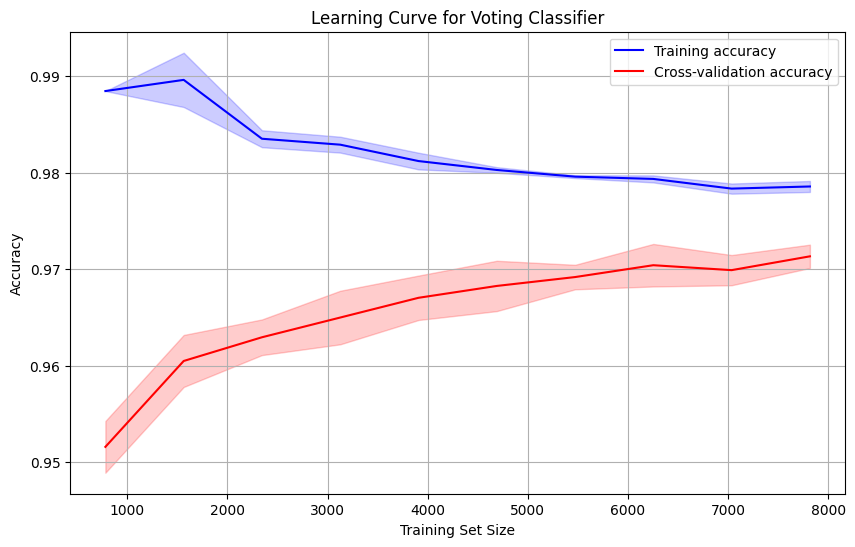

Learning Curve Calculation Time: 718.8544 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, learning_curve


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)

cv_scores = cross_val_score(voting_clf, X_balanced, y_balanced, cv=5, scoring='accuracy')


cv_accuracy_mean = np.mean(cv_scores)
cv_accuracy_std = np.std(cv_scores)

print(f"5-Fold Cross Validation Accuracy: {cv_accuracy_mean:.4f} ± {cv_accuracy_std:.4f}")


start_train_time = time.time()

train_sizes, train_scores, test_scores = learning_curve(
    voting_clf, X_balanced, y_balanced, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

end_train_time = time.time()
learning_curve_time = end_train_time - start_train_time

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation accuracy', color='red')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Voting Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()


print(f"Learning Curve Calculation Time: {learning_curve_time:.4f} seconds")


In [225]:
from sklearn.metrics import cohen_kappa_score

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


kappa_scores = {}

for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    clf.fit(X_balanced, y_balanced)


    y_test_pred = clf.predict(X_test)


    kappa = cohen_kappa_score(y_test, y_test_pred)
    kappa_scores[clf_name] = kappa


    print(f"Cohen's Kappa Score for {clf_name}: {kappa:.4f}")


print("\nCohen's Kappa Scores for All Classifiers:")
for clf_name, kappa in kappa_scores.items():
    print(f"{clf_name}: {kappa:.4f}")



Training Random Forest...
Cohen's Kappa Score for Random Forest: 0.9830

Training Decision Tree...
Cohen's Kappa Score for Decision Tree: 0.9760

Training Extra Trees...
Cohen's Kappa Score for Extra Trees: 0.9672

Training KNN...
Cohen's Kappa Score for KNN: 0.9544

Training MLP...
Cohen's Kappa Score for MLP: 0.9724

Training CatBoost...
Cohen's Kappa Score for CatBoost: 0.9824

Training XGBoost...
Cohen's Kappa Score for XGBoost: 0.9836

Cohen's Kappa Scores for All Classifiers:
Random Forest: 0.9830
Decision Tree: 0.9760
Extra Trees: 0.9672
KNN: 0.9544
MLP: 0.9724
CatBoost: 0.9824
XGBoost: 0.9836


In [227]:
from sklearn.metrics import cohen_kappa_score

# Fit the model to get the predictions (for Kappa score)
voting_clf.fit(X_balanced, y_balanced)
y_pred = voting_clf.predict(X_balanced)

# Calculate Kappa Score
kappa_score = cohen_kappa_score(y_balanced, y_pred)

# Print Kappa Score
print(f"Kappa Score: {kappa_score:.4f}")


Kappa Score: 0.9976
